In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
IMG_HEIGHT, IMG_WIDTH = 128, 128
BATCH_SIZE = 32

# Dataset Paths
DATASET_PATH = r"C:\Users\EDWIN\OneDrive\Desktop\Study materials\SEM-6\MV Project\Dataset" 

TRAIN_DIR = DATASET_PATH 


In [19]:
# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30,
                                   width_shift_range=0.3, height_shift_range=0.3,
                                   shear_range=0.3, zoom_range=0.3, horizontal_flip=True, validation_split=0.3)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load Training and Validation Data
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE, class_mode='categorical', subset='training')

validation_generator = train_datagen.flow_from_directory(
    TRAIN_DIR, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE, class_mode='categorical', subset='validation')


Found 28000 images belonging to 2 classes.
Found 12000 images belonging to 2 classes.


In [20]:
from tensorflow.keras.regularizers import l2

def build_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D(2,2),
        
        Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.6),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [21]:
model = build_model()
model.summary()
history = model.fit(train_generator, validation_data=validation_generator, epochs=5)

# Save the trained model
model.save("crack_detection_model.h5")

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,794 (12.61 MB)

 Trainable params: 3,305,346 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/5


C:\Users\EDWIN\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


875/875 ━━━━━━━━━━━━━━━━━━━━ 494s 560ms/step - accuracy: 0.9214 - loss: 0.6905 - val_accuracy: 0.9265 - val_loss: 0.5351
Epoch 2/5
875/875 ━━━━━━━━━━━━━━━━━━━━ 485s 553ms/step - accuracy: 0.9776 - loss: 0.4167 - val_accuracy: 0.9814 - val_loss: 0.3900
Epoch 3/5
875/875 ━━━━━━━━━━━━━━━━━━━━ 483s 552ms/step - accuracy: 0.9808 - loss: 0.3750 - val_accuracy: 0.9788 - val_loss: 0.3570
Epoch 4/5
875/875 ━━━━━━━━━━━━━━━━━━━━ 484s 552ms/step - accuracy: 0.9822 - loss: 0.3362 - val_accuracy: 0.9844 - val_loss: 0.2961
Epoch 5/5
875/875 ━━━━━━━━━━━━━━━━━━━━ 484s 552ms/step - accuracy: 0.9837 - loss: 0.2932 - val_accuracy: 0.9805 - val_loss: 0.2853


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the trained model
model = load_model("crack_detection_model.h5")

# Evaluate on the validation dataset
loss, accuracy = model.evaluate(validation_generator, verbose=1)
print(f"Validation Accuracy: {accuracy*100:.2f}%")
print(f"Validation Loss: {loss:.4f}")

# Get predictions
val_preds = model.predict(validation_generator)
val_preds_classes = np.argmax(val_preds, axis=1)
val_true_classes = validation_generator.classes

# Print classification report
print("\nClassification Report:")
print(classification_report(val_true_classes, val_preds_classes, target_names=list(validation_generator.class_indices.keys())))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(val_true_classes, val_preds_classes))


375/375 ━━━━━━━━━━━━━━━━━━━━ 62s 163ms/step - accuracy: 0.9805 - loss: 0.2791
Validation Accuracy: 98.05%
Validation Loss: 0.2794
375/375 ━━━━━━━━━━━━━━━━━━━━ 62s 164ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.50      0.48      0.49      6000
    Positive       0.50      0.51      0.50      6000

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.50     12000
weighted avg       0.50      0.50      0.50     12000


Confusion Matrix:
[[2902 3098]
 [2940 3060]]


# Trial 2


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import os

In [7]:
dataset_path = r"C:\Users\EDWIN\OneDrive\Desktop\Study materials\SEM-6\MV Project\Dataset" 

IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32
EPOCHS = 5

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20, 
    width_shift_range=0.2, 
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,
    validation_split=0.25  # 80% training, 20% validation
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)

# Load Train & Validation Data
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Binary classification
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Print class indices (optional, to verify)
print("Class Indices:", train_generator.class_indices)

Found 30000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.
Class Indices: {'Negative': 0, 'Positive': 1}


In [13]:
def build_model():
    model = Sequential([
        # Conv Block 1
        Conv2D(32, (5,5), activation='relu', padding='same', kernel_regularizer=l2(0.001), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        BatchNormalization(),
        MaxPooling2D(2,2),

        # Conv Block 2
        Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D(2,2),

        # Conv Block 3
        Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D(2,2),

        # Conv Block 4
        Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D(2,2),

        # Global Average Pooling
        GlobalAveragePooling2D(),

        # Fully Connected Layers
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    # Compile Model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    return model

In [14]:
model = build_model()
model.summary()

C:\Users\EDWIN\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\EDWIN\AppData\Roaming\Python\Python312\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 490,689 (1.87 MB)

 Trainable params: 489,729 (1.87 MB)

 Non-trainable params: 960 (3.75 KB)

In [15]:
# ✅ Train Model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# ✅ Save the model
model.save("crack_detection_model_2.h5")
print("Model saved as crack_detection_model.h5")

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2001s 2s/step - accuracy: 0.9290 - loss: 0.8683 - val_accuracy: 0.9245 - val_loss: 0.7480
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1942s 2s/step - accuracy: 0.9899 - loss: 0.5765 - val_accuracy: 0.9924 - val_loss: 0.4496
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1818s 2s/step - accuracy: 0.9901 - loss: 0.4304 - val_accuracy: 0.9880 - val_loss: 0.3427
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1882s 2s/step - accuracy: 0.9897 - loss: 0.3198 - val_accuracy: 0.9964 - val_loss: 0.2316
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1637s 2s/step - accuracy: 0.9921 - loss: 0.2324 - val_accuracy: 0.9679 - val_loss: 0.2822


Model saved as crack_detection_model.h5


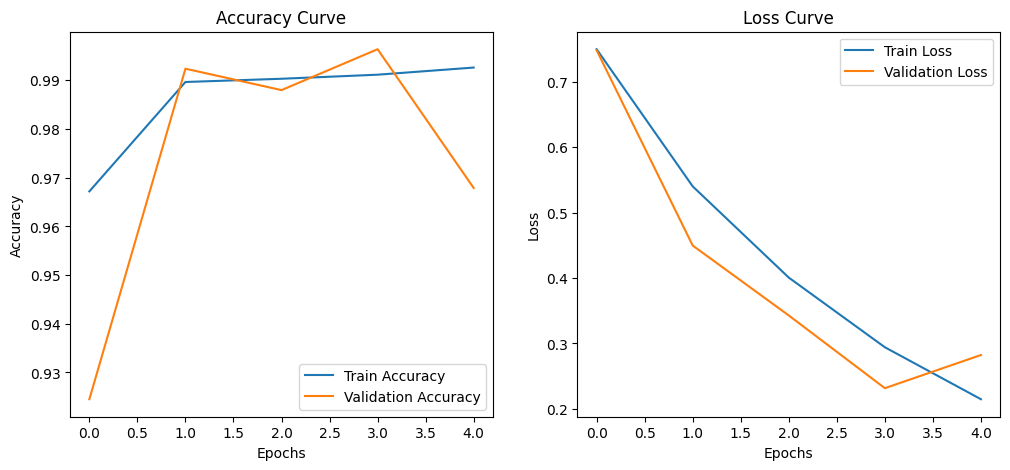

In [16]:
def plot_training(history):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Curve')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Curve')

    plt.show()

# Call function to plot training curves
plot_training(history)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

true_labels = val_generator.classes

# Get Predictions
predictions = model.predict(val_generator)
predicted_labels = (predictions > 0.5).astype(int).flatten()  # Convert probabilities to binary labels

# Print Classification Report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=["Negative", "Positive"]))

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 78s 250ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.51      0.47      0.49      5000
    Positive       0.50      0.53      0.52      5000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000


Confusion Matrix:
[[2373 2627]
 [2326 2674]]
